In [32]:
import numpy as np
import pandas as pd

In [33]:
def first(lab3):
    ## Trabsformation number 1: standardize column headers
    cols=[]
    for i in range (len(lab3.columns)):
        cols.append(lab3.columns[i].lower())
    lab3.columns = cols
    
    ## Transformation number 2: deal with NanN values
    
    # Scenario 1: delete a row if they have all NaN 
    lab3=lab3.dropna(how='all')
    lab3.reset_index(drop=True,inplace=True)
    
    #Scenario 2: Fill in vehicle class unknown values
    lab3['vehicle class']= lab3['vehicle class'].fillna("Unknown")
    
    #Scenario 3: Fill in vhicle size unknown values
    lab3['vehicle size']= lab3['vehicle size'].fillna("Unknown")
    
    #Scenario 4: Fill in vehicle type unknwon values
    lab3['vehicle type']= lab3['vehicle type'].fillna("Unknown")
    
    #Scnario 5: Fill in NaN opn complaints with median number
    med_16=lab3['number of open complaints'].median()
    lab3['number of open complaints']=lab3['number of open complaints'].fillna(med_16)
    
    #Scenario 6: Fill in NaN months since last claim with median value
    med_14=lab3['months since last claim'].median()
    lab3['months since last claim']=lab3['months since last claim'].fillna(med_14)
    
    #Scnario 7: Fill all of columns with NaN data with Unknown
    lab3.fillna("Unknown",inplace=True)
    
    
    ## Transformation number 3: Extract only data for the first quarter
    import time
    from datetime import date
    
    lab3['effective to date']=pd.to_datetime(lab3['effective to date'],errors='coerce')
    
    
    return lab3


In [4]:
bun=pd.read_csv('/Users/macbook/Documents/IRON  HACK/Day3_Pandas_Date format/marketing_customer_analysis.csv')

In [34]:
lab4 = first(bun)

In [35]:
lab4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed: 0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer lifetime value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective to date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location code  

In [7]:
import time
from datetime import date
    
lab4['effective to date']=pd.to_datetime(lab4['effective to date'],errors='coerce')
    

# <font color=darkred>DAY 4: Customer Analysis Round 3

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
lab4.describe()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.082401,48.091934,0.361962,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,9.787208,27.940675,0.890134,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [38]:
lab4['sales channel'].unique()

array(['Agent', 'Call Center', 'Branch', 'Web'], dtype=object)

## 3. Show a plot of the total number of responses (for each response type - "Yes"/"No").

<AxesSubplot:>

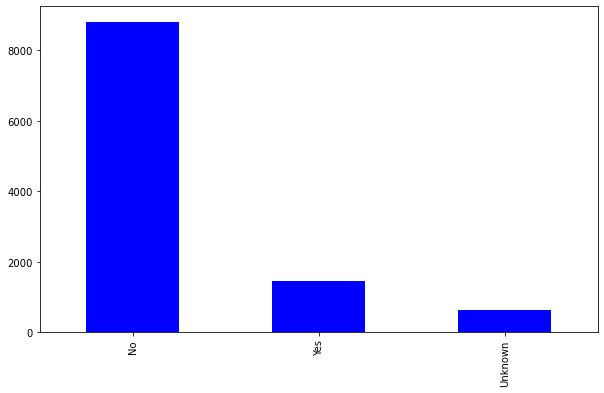

In [11]:
lab4['response'].value_counts().plot(kind='bar',color='blue',figsize = (10, 6))

## 4. Show a plot of the rate of the response types by each Sales Channel.

<AxesSubplot:xlabel='response', ylabel='response'>

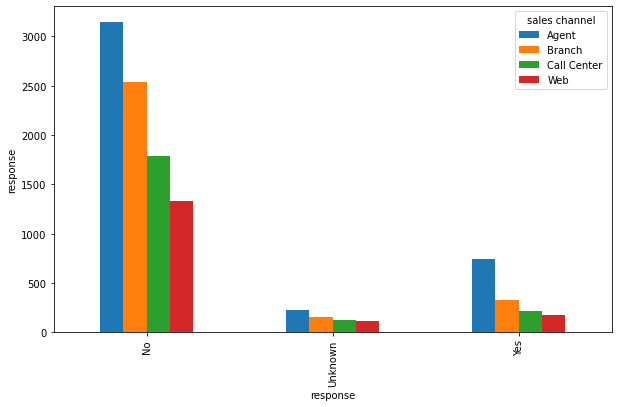

In [12]:
lab4.groupby('response')['sales channel'].value_counts().unstack().plot.bar(ylabel='response',figsize = (10, 6))


## 5. Show a plot of the distribution of the Total Claim Amount, broken down by response type. Try a boxplot and distribution plot, for each response type. For the distribution plot, try to plot both kinds of responses in one chart (seaborn's histplot, using the 'hue' parameter is very convenient here).

####  . boxplot

<AxesSubplot:xlabel='total claim amount', ylabel='response'>

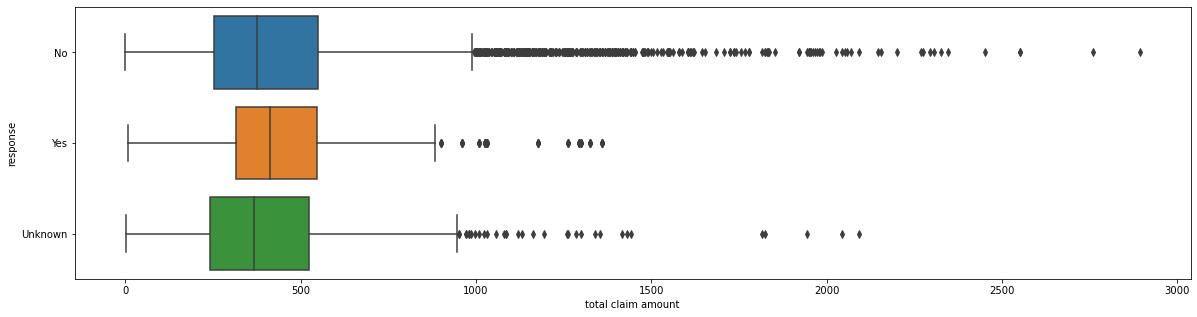

In [13]:
plt.figure(figsize=(20,5))
sns.boxplot(x='total claim amount',y='response',data=lab4)

In [ ]:
#Consclusion: the response type is not based on the total claim amount, since 3 types of responsed present the similar claim aount value, which is range from 250 to 500.
#Note: In Reponses No: there are significant number of outliers which has the claim amount more than 1000

#### the distribution plot

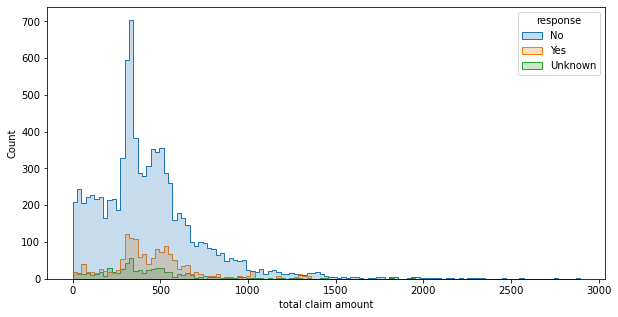

In [39]:
plt.figure(figsize=(10,5))
x=sns.histplot(lab4, x="total claim amount", hue="response", element="step")
#element: type of graps

## 6.Create similar plots like in the task before, but for Income.


<AxesSubplot:xlabel='income', ylabel='response'>

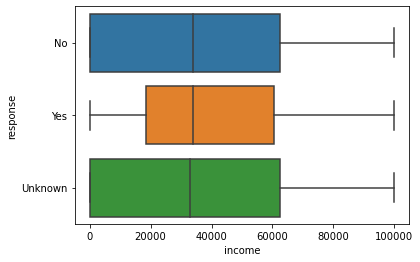

In [40]:
sns.boxplot(x='income',y='response',data=lab4)

In [ ]:
#conclusion:

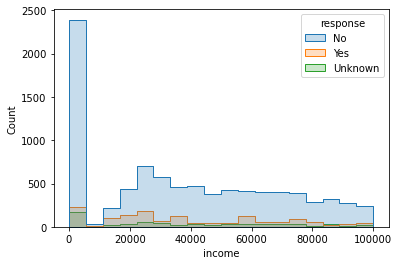

In [25]:
x=sns.histplot(lab4, x="income", hue="response", element="step")

In [ ]:
#cons:

## 7. Create a scatterplot between Total Claim Amount and Income. Play around with the settings of the scatterplot (markersize, alpha level, ...) and in doing so try to identify more features within the data just visually. You can also try different seaborn plots. Check for example this link which explains how to avoid overplotting.

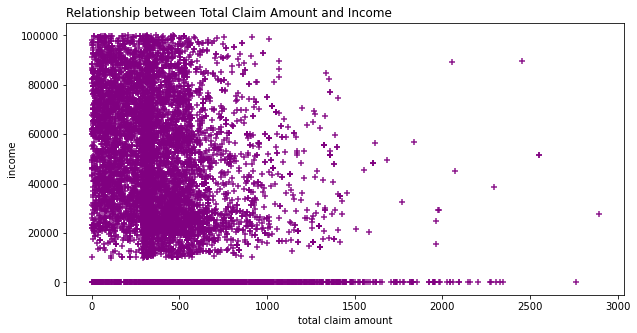

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(data=lab4,x='total claim amount',y='income',marker= '+', alpha=0.9, color="purple")
plt.xlabel('total claim amount')
plt.ylabel('income')
plt.title('Relationship between Total Claim Amount and Income', loc='left')
plt.show()

In [ ]:
#conclusion:there are 2 groups of customers, group 1 has 0 income but the range of the total claim amount is large.
#group2 has income range from 20k to 100k, all presents the total claim amount from 0-550

# <font color='darkred'> Lab 4.b

## 1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [42]:
numerical=lab4.select_dtypes([np.number])
numerical

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,14.0,31,0.0,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,14.0,40,0.0,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [43]:
categorical=lab4.select_dtypes('object')
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Unknown
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Unknown
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,Unknown
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


## 2. Now we will try to check the normality of the numerical variables visually
* Use seaborn library to construct distribution plots for the numerical variables
* Use Matplotlib to construct histograms
* Do the distributions for different numerical variables look like a normal distribution

In [44]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [45]:
lab4_num=lab4._get_numeric_data()

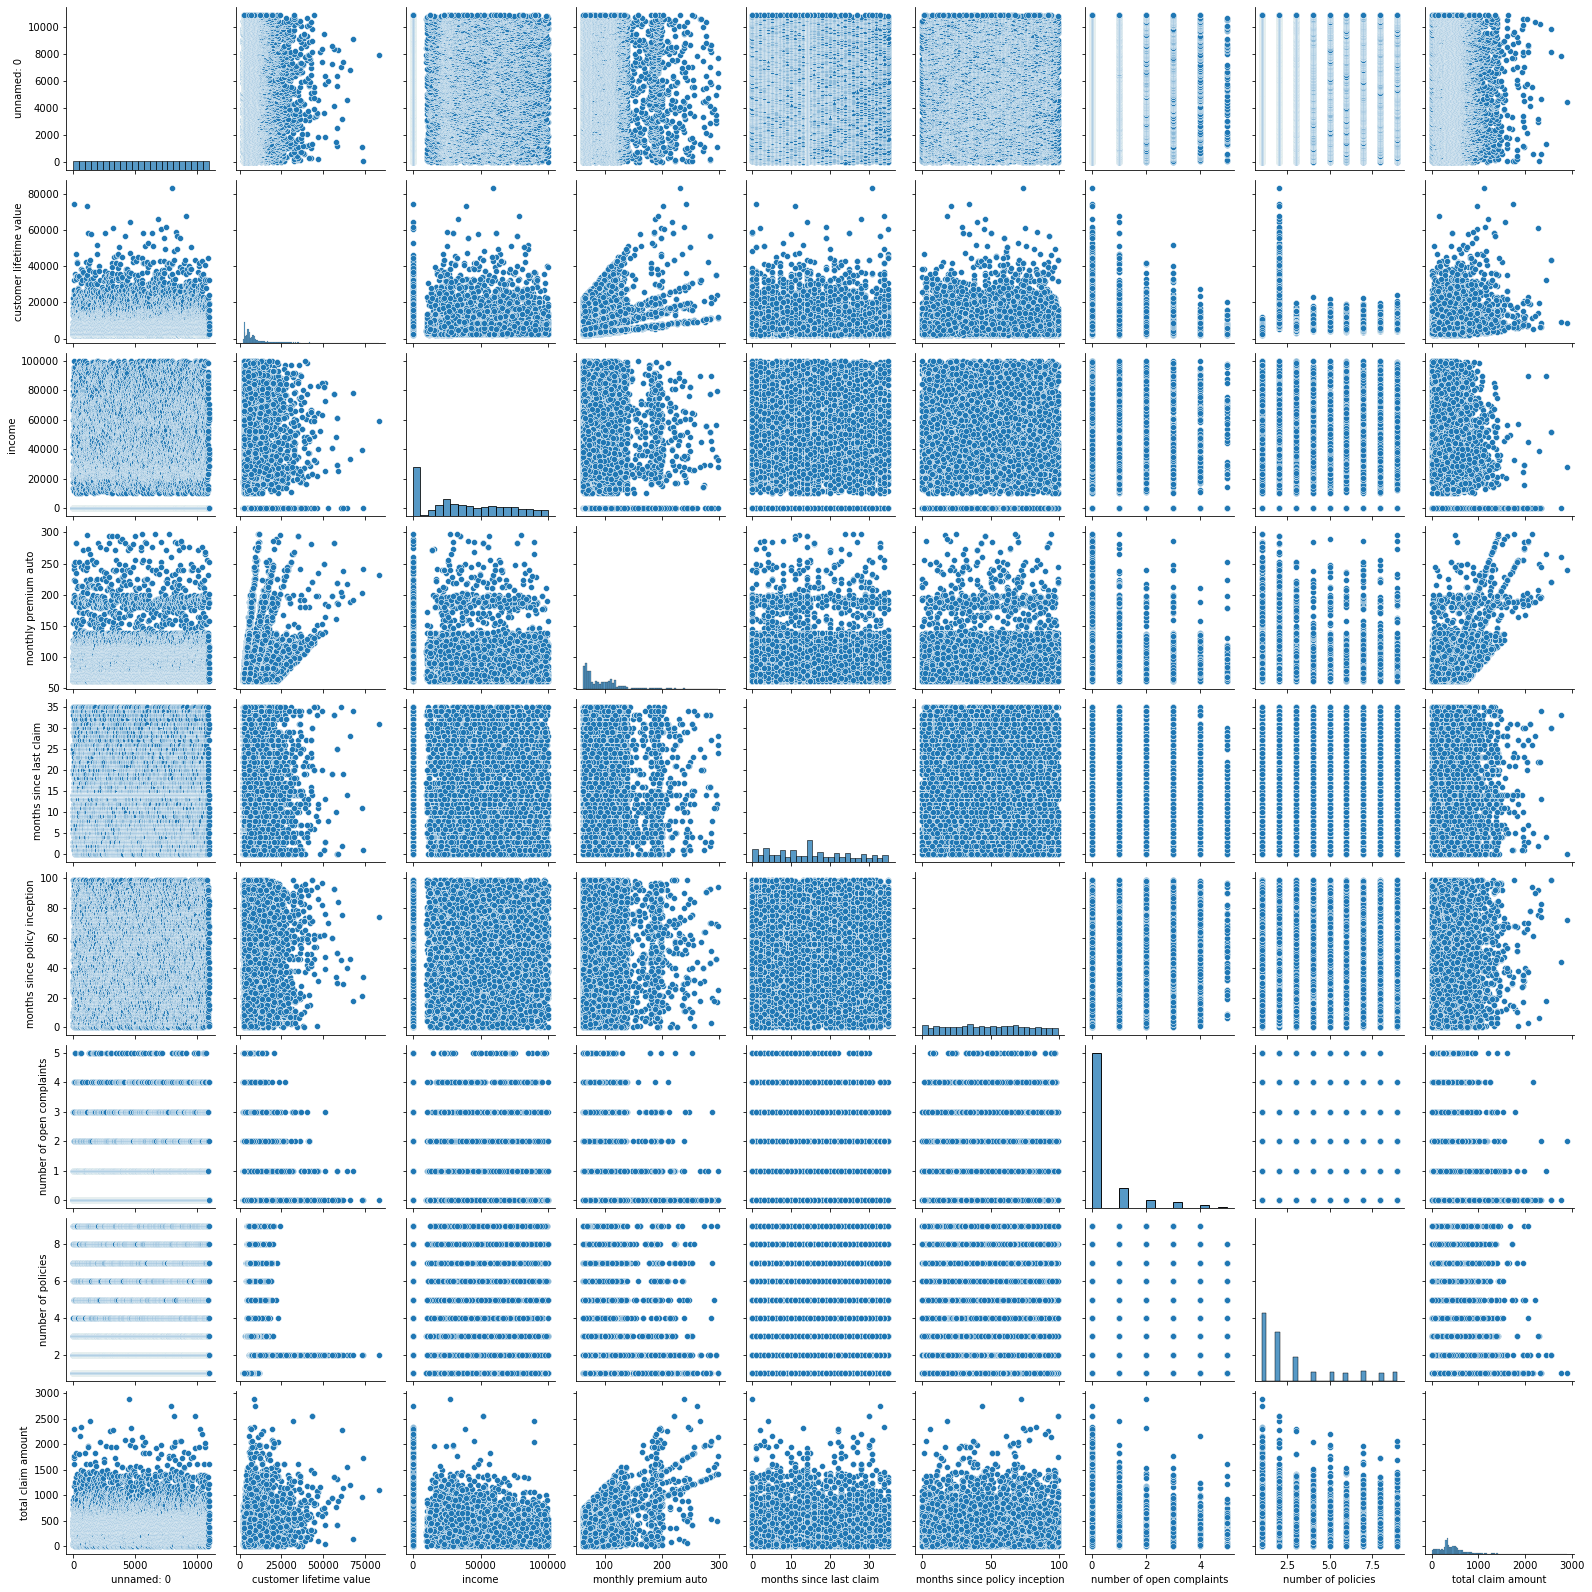

In [46]:
sns.pairplot(lab4_num);

### * Use Matplotlib to construct histograms

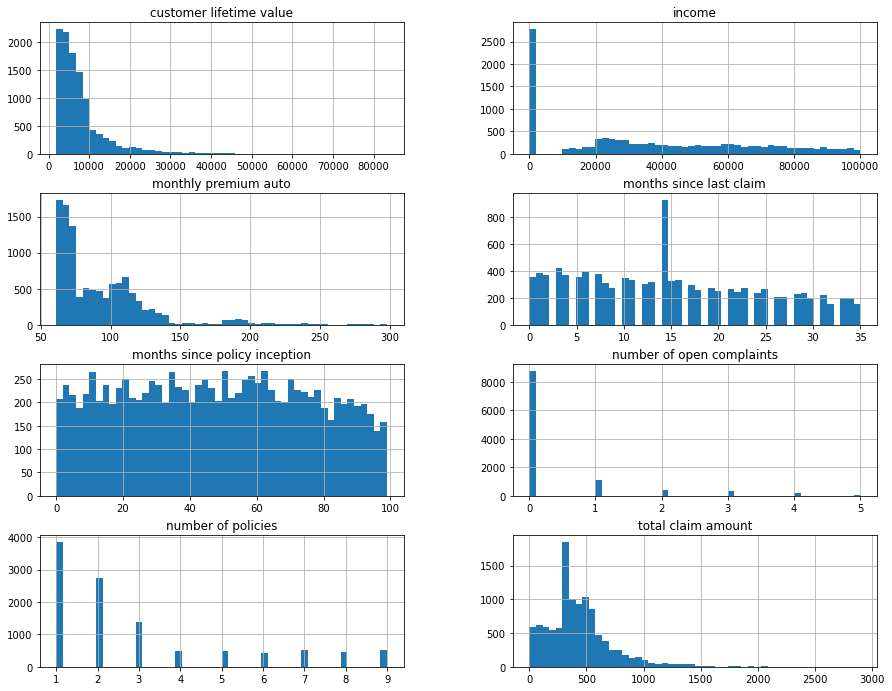

In [22]:
lab4_num.hist(figsize=(15,15), bins=50, layout=(5,2));

### 3.For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
### 4.Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [47]:
corre_matrix=lab4.corr() #only for numerical filed
corre_matrix

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
unnamed: 0,1.000000,0.001355,0.008910,0.000863,0.008228,0.012795,0.008943,0.002319,-0.000593
customer lifetime value,0.001355,1.000000,0.028306,0.403069,0.015874,0.016960,-0.030616,0.016024,0.232626
income,0.008910,0.028306,1.000000,-0.009788,-0.022708,-0.005903,0.008425,-0.009960,-0.354141
monthly premium auto,0.000863,0.403069,-0.009788,1.000000,0.008489,0.018953,-0.010059,-0.020505,0.631799
months since last claim,0.008228,0.015874,-0.022708,0.008489,1.000000,-0.038157,0.005004,0.006807,0.012340
months since policy inception,0.012795,0.016960,-0.005903,0.018953,-0.038157,1.000000,0.004165,-0.009123,0.003095
number of open complaints,0.008943,-0.030616,0.008425,-0.010059,0.005004,0.004165,1.000000,0.001681,-0.012380
number of policies,0.002319,0.016024,-0.009960,-0.020505,0.006807,-0.009123,0.001681,1.000000,-0.008923
total claim amount,-0.000593,0.232626,-0.354141,0.631799,0.012340,0.003095,-0.012380,-0.008923,1.000000


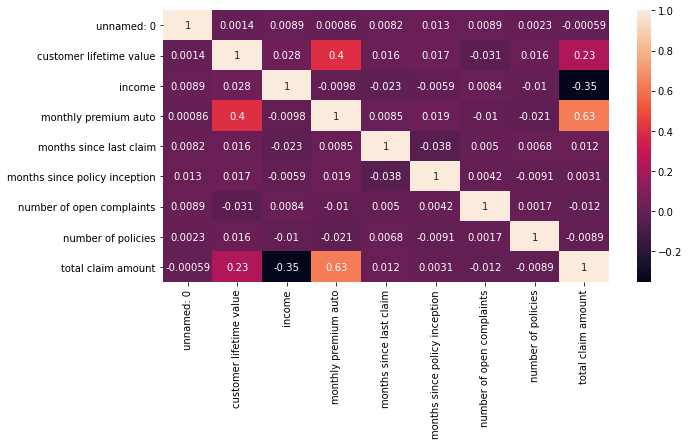

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(corre_matrix, annot=True);

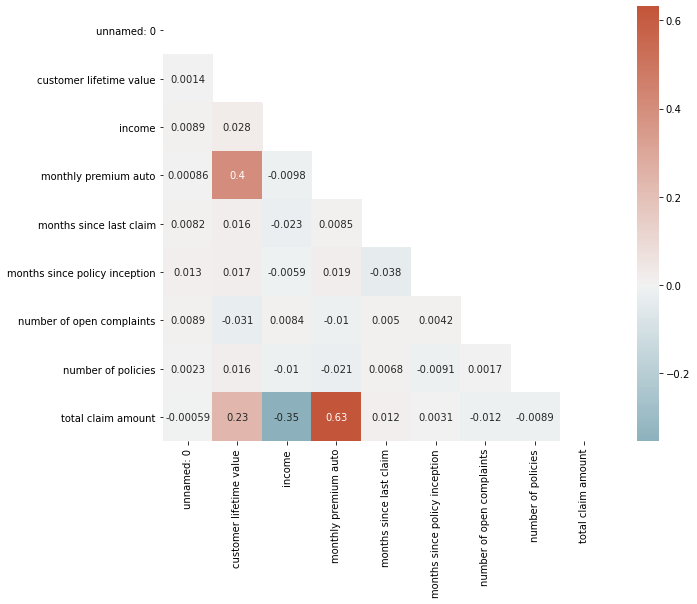

In [50]:
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(10,8))
ax=sns.heatmap(corre_matrix, mask=mask, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True);